
# Galactic Archeology: the Chemical Evolution of Stellar Populations


Elements heavier than hydrogen and helium are produced by nuclear reactions in stars and released into the interstellar medium when stars die. New generations of stars form from gas in the interstellar medium, which has been enriched by earlier generations of stars. Low-mass stars have long lives on the main sequence, during which their chemical abundances at the surface remain mostly unchanged, so they can be used to investigate chemical enrichment history of the Galaxy.





Jofré et al. (2017) used a phylogenetic tree to classify stars in the stellar neighborhood based on metal abundance. These abundances were derived by Nissen (2015, 2016)


The aim is used other statistical methods and extend the classification to a set of thousands of nearby stars.

# Reproduce result in Jofre 2017

As a first part of our project, we reproduced the tree made by Jofre 2017. We used Hierarchical Clustering so we didn't need to choose the number of clusters in the sample.

In [1]:
library(phangorn)

abundance = read.table("data/abundance.txt", header = T, sep = ",")
action = read.table("data/actions.txt", header = T, sep = ",")

rownames(abundance) = paste(rownames(abundance), sep = "____", action$Age[-22])

n = nrow(abundance) ## number of stars
p = ncol(abundance) ## number of chemicals/features

Loading required package: ape


To apply the Hierarchical Clustering algorithm we need to make the distance matrix. We calculated the distance between the stars taking into account the distance between the chemical elements. We used L^1 norm to keep the same metric as in Jofre et al. (2017):
\begin{equation*}
D_{ij} = \sum_{k=1}^N \left| [X_k/Fe]_i -[X_k/Fe]_j \right|
\end{equation*}

In [2]:
D = as.matrix(dist(abundance, method = "manhattan")) ## distance matrix according to equation (1) in Jofre 2017.

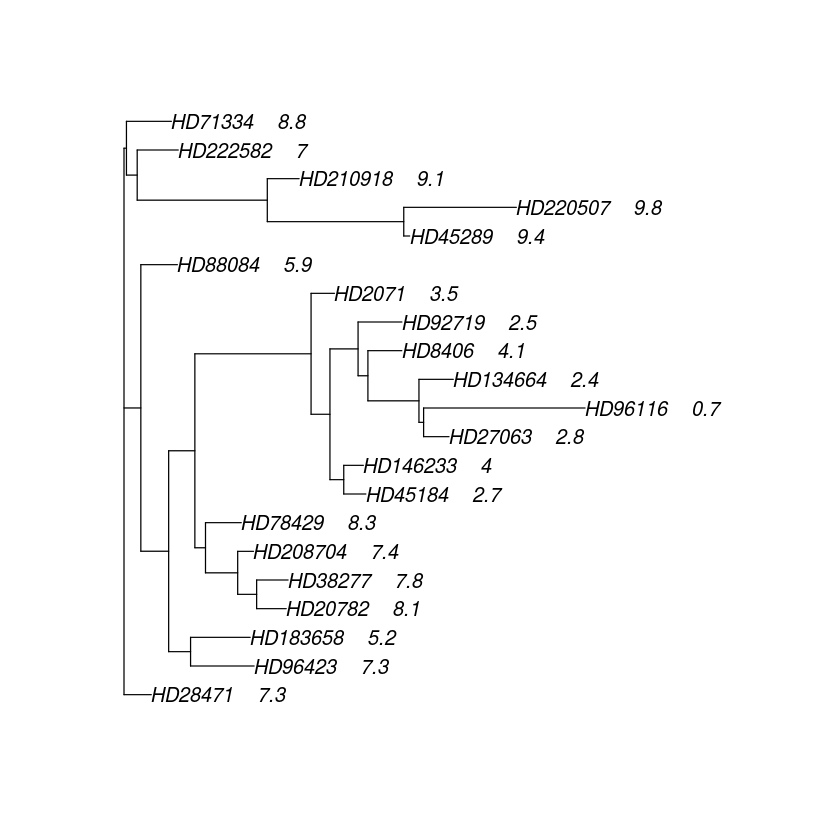

In [3]:
phytree = NJ(D) ## original tree using NJ method
plot(phytree) ## plot original tree, rooted

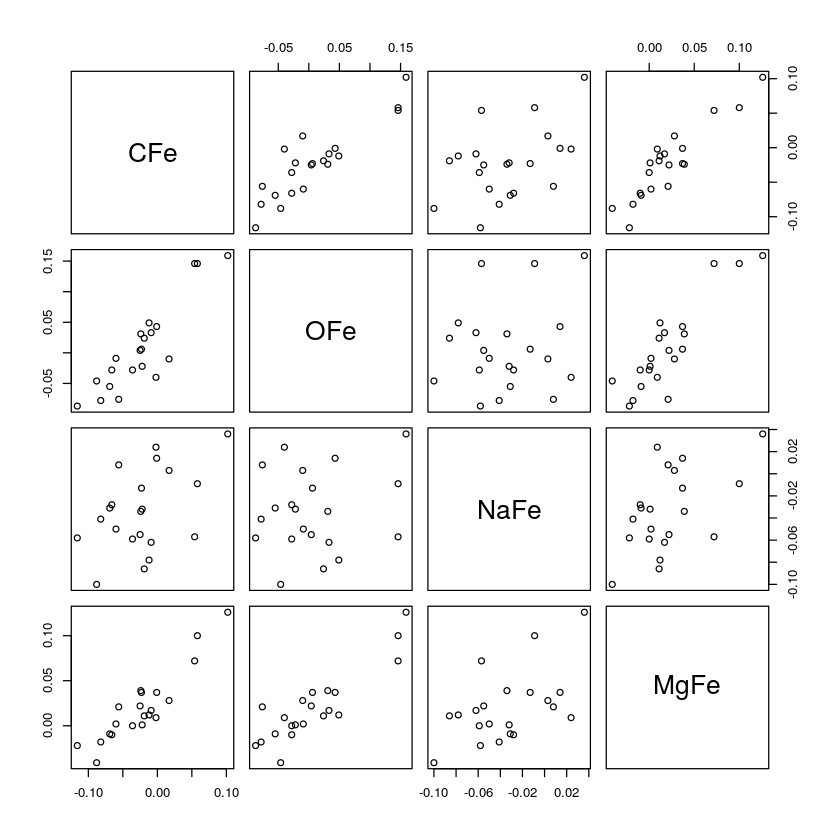

In [4]:
pairs(abundance[,1:4]) #plot the pairlot (every variable against the others)


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
CFe  -0.298  0.207         0.627  0.194 -0.295  0.273         0.304  0.283 
OFe  -0.382  0.512  0.291         0.282  0.150 -0.568  0.228               
NaFe -0.120 -0.142 -0.524  0.113  0.325                      -0.219  0.286 
MgFe -0.234  0.149        -0.165 -0.187         0.132        -0.157  0.293 
AlFe -0.332        -0.146 -0.324 -0.288 -0.242  0.257  0.505  0.197        
SiFe -0.143        -0.107         0.153               -0.220 -0.262        
SFe  -0.194  0.143         0.453 -0.534               -0.104 -0.105 -0.482 
CaFe         0.179        -0.116 -0.120 -0.219               -0.472        
TiFe -0.187  0.163        -0.258 -0.161               -0.284         0.253 
CrFe                             -0.225  0.191         0.363 -0.307  0.194 
NiFe        -0.139 -0.273                0.117 -0.141  0.157        -0.107 
ZnFe -0.288        -0.157        -0.106  0.514  0.128 -0.427         0.115 
Y

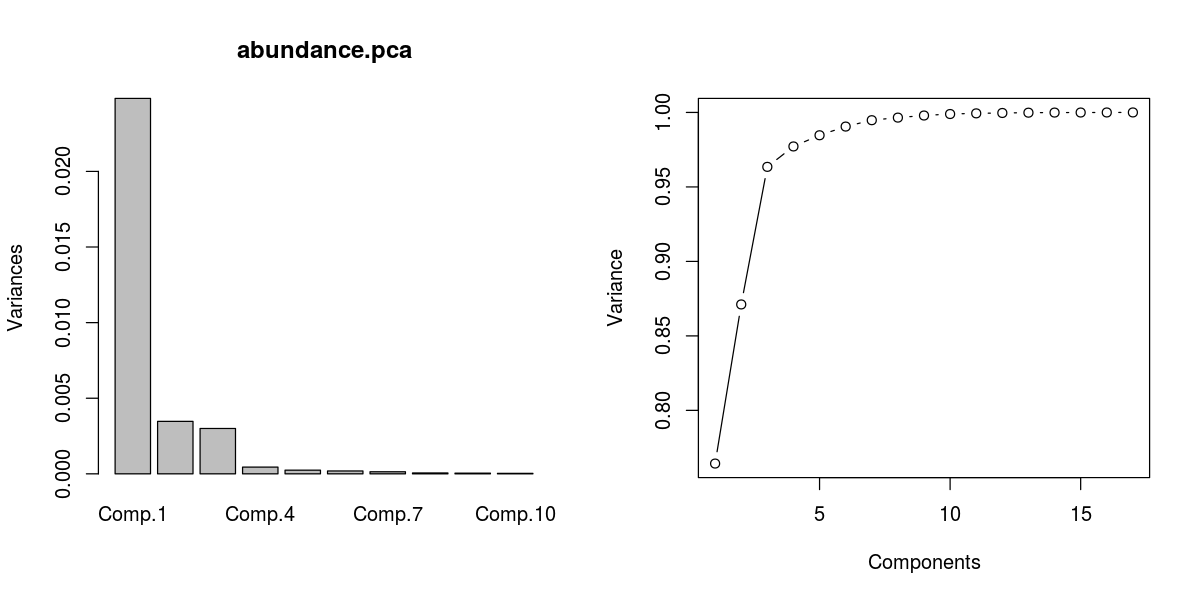

In [25]:
abundance.pca = princomp(abundance) #Calculate the principal components
sdev = abundance.pca$sdev #Saving the standard deviation
abundance.scores.wt = sdev^2/sum(sdev^2)
abundance.pca$loadings
abundance.scores = abundance.pca$scores #Coordinates for each star in the new reference frame
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
plot(abundance.pca)  #Plot the histogram of the variance for the principal components

plot(cumsum(abundance.scores.wt),type="b", xlab="Components", ylab = "Variance")
# data.pca$loadings #Print the coeficients for the components

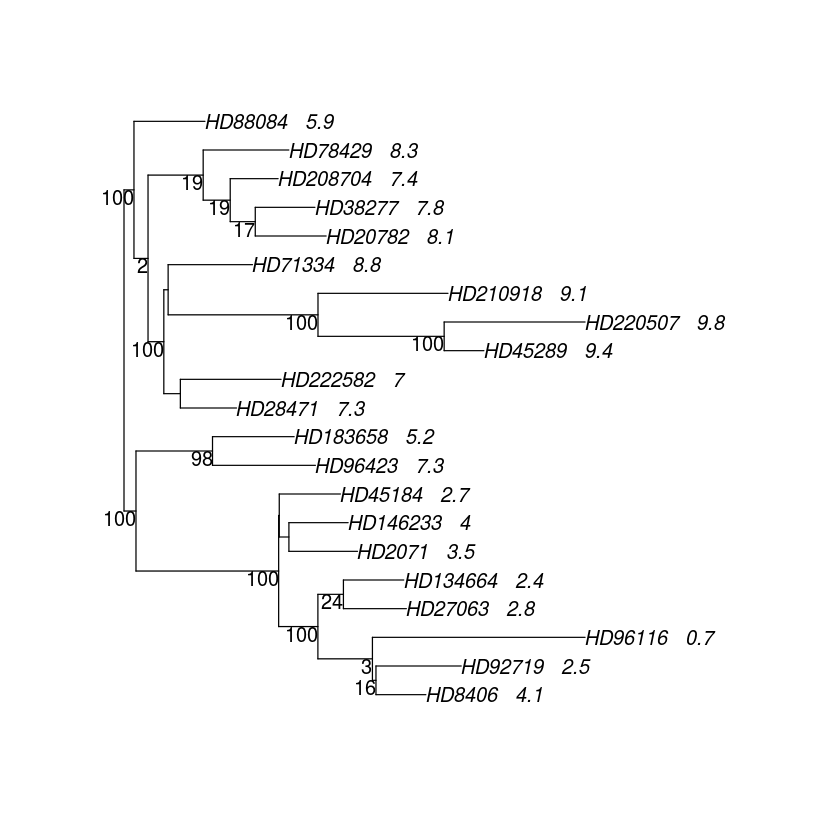

In [10]:
library(ape)
library(geiger)
library(phangorn)

abundance = read.table("data/abundance_pca.txt", header = T, sep = ",")
sdev = read.table("data/sdev_data.txt", header = T, sep = ",")
pcawt = sdev^2/sum(sdev^2)
action = read.table("data/actions.txt", header = T, sep = ",")

rownames(abundance) = paste(rownames(abundance), sep = "___", action$Age[-22])

n = nrow(abundance) ## number of stars
p = ncol(abundance) ## number of chemicals/features

D = as.matrix(dist(abundance, method = "manhattan")) ## distance matrix according to equation (1) in Jofre 2017.

phytree = NJ(D) ## original tree using NJ method

## begin boostrapping

B = 1000 ## number of bootstrapping samples
set.seed(2017) ## always a good idea to set the seed
Bsample = matrix(0,nrow = B,ncol=p) ## matrix to store bootstrapping sample index
for(ii in 1:B){
  Bsample[ii,] = sample(1:p, replace = T, prob = pcawt) ## with replacement
}

njtrees = list() ## storee bootstrapping trees in a list
for(jj in 1:B){
  abundancejj = abundance[,Bsample[jj,]] ## resamaple the features, not the observatios/stars
  Djj = as.matrix(dist(abundancejj, method = "manhattan"))
  njtrees[[jj]] = NJ(Djj)
}
class(njtrees) <- "multiPhylo"

options(repr.plot.width=7, repr.plot.height=7)
## plot the bootstrapping/robust tree
treeNJ <- plotBS(phytree, njtrees, "phylogram", p=0) ## p is the proportion support to see if branch is significant or not
treeNJ.prune <- pruneTree(treeNJ, 90)

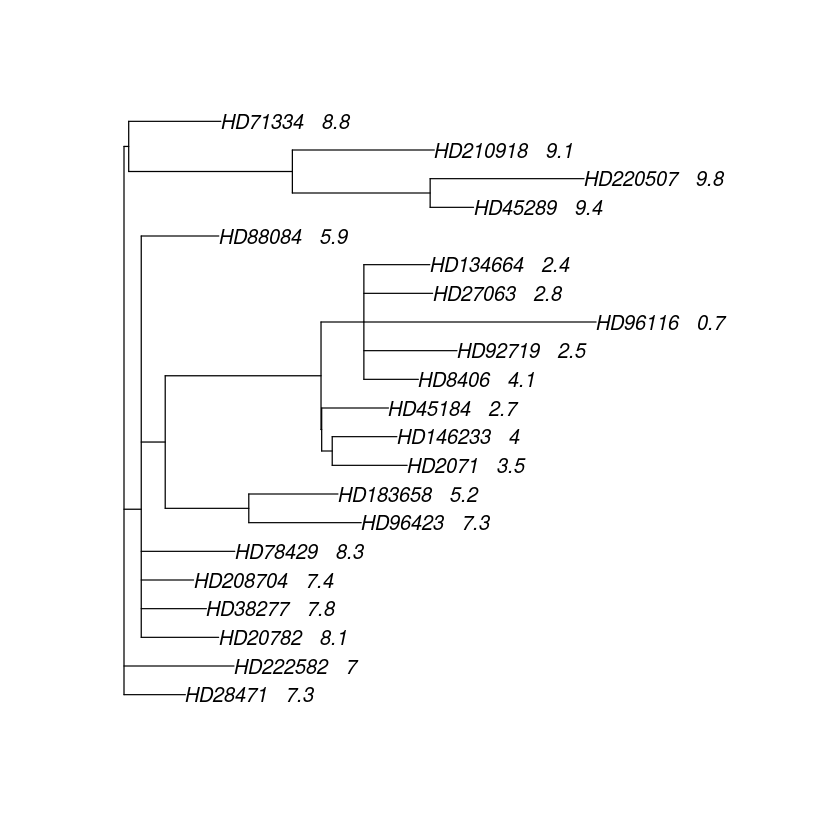

In [11]:
plot(treeNJ.prune)

# Other methods

## Cross-validation to select number of clusters

Loading required package: cluster



Clustering Methods:
 kmeans pam 

Cluster sizes:
 2 3 4 5 6 7 8 

Validation Measures:
                           2       3       4       5       6       7       8
                                                                            
kmeans Connectivity   4.6786  8.9683 12.2563 14.5897 22.2393 26.3488 32.0250
       Dunn           0.4814  0.7386  0.6491  0.6491  0.6038  0.6783  0.6965
       Silhouette     0.3649  0.4255  0.3647  0.3235  0.2842  0.3104  0.2891
pam    Connectivity   4.7813  8.9683 16.6179 23.5060 27.6155 29.9488 32.0250
       Dunn           0.4798  0.7386  0.5173  0.4295  0.4295  0.4406  0.6965
       Silhouette     0.3530  0.4255  0.3457  0.2724  0.2928  0.2801  0.2891

Optimal Scores:

             Score  Method Clusters
Connectivity 4.6786 kmeans 2       
Dunn         0.7386 kmeans 3       
Silhouette   0.4255 kmeans 3       



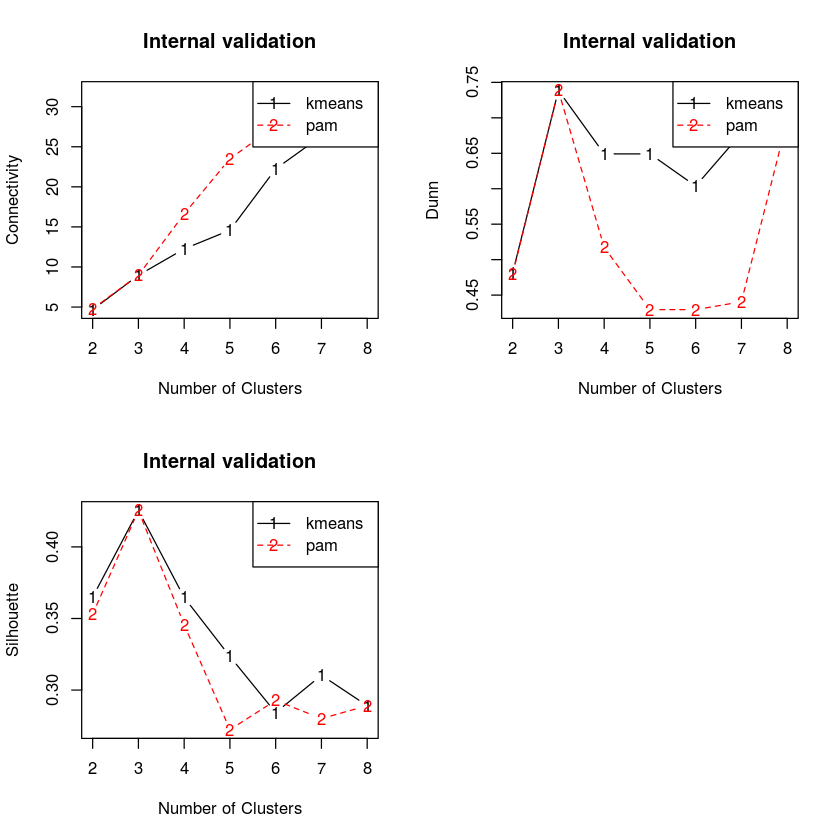

In [12]:
library(clValid)
clabundance = clValid(abundance.scores, nClust = 2:8, clMethods = c("kmeans","pam"), 
        validation = c("internal"), metric = "manhattan")
summary(clabundance)
par(mfrow=c(2,2))
plot(clabundance)

From above plots, we'll choose 3 as number of clusters.

## K-means and PAM (Partitioning Around Medoids)

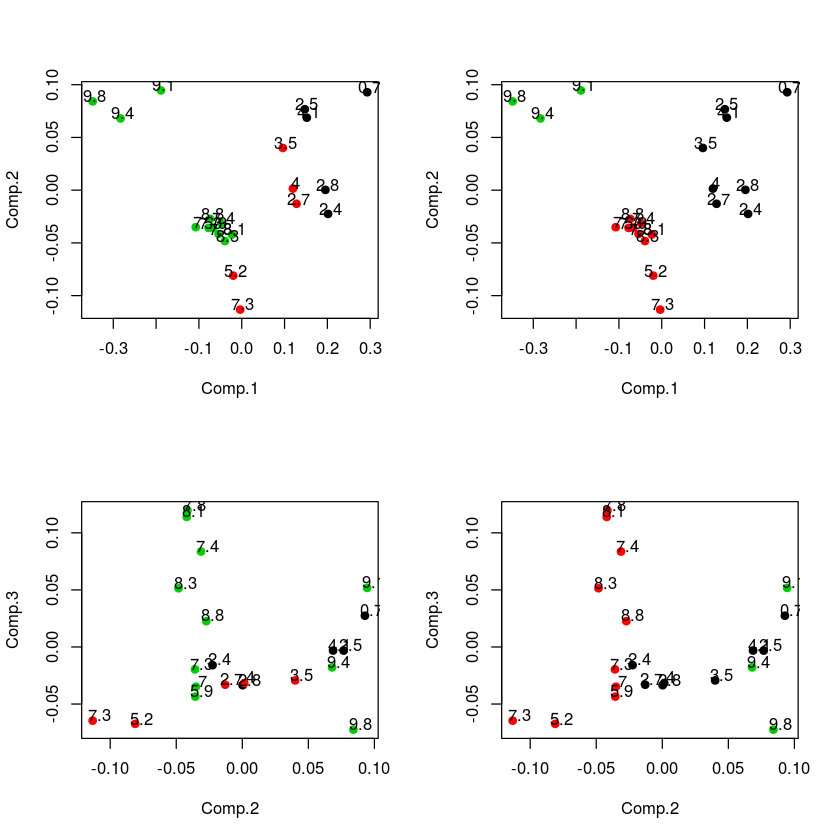

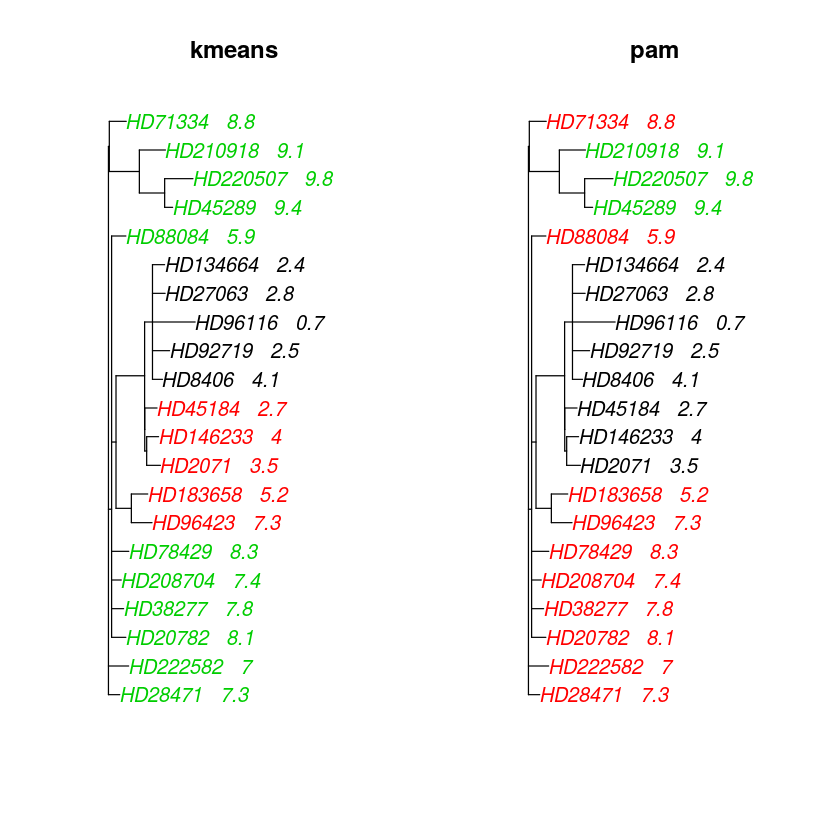

In [13]:
library(cluster)

abundance.kmeans = kmeans(abundance.scores[,1:3],3,iter.max = 1000)
abundance.pam = pam(abundance.scores,3,metric = "manhattan")

par(mfrow = c(2,2))
plot(abundance.scores[,1:2],col = abundance.kmeans$cluster, pch = 19)
text(abundance.scores[,1:2] + 0.005, label=action$Age[-22])
plot(abundance.scores[,1:2],col = abundance.pam$clustering, pch = 19)
text(abundance.scores[,1:2] + 0.005, label=action$Age[-22])
plot(abundance.scores[,2:3],col = abundance.kmeans$cluster, pch = 19)
text(abundance.scores[,2:3] + 0.005, label=action$Age[-22])
plot(abundance.scores[,2:3],col = abundance.pam$clustering, pch = 19)
text(abundance.scores[,2:3] + 0.005, label=action$Age[-22])
par(mfrow = c(1,1))
par(mfrow = c(1,2))
plot(treeNJ.prune,tip.color = abundance.kmeans$cluster, main="kmeans")
plot(treeNJ.prune,tip.color = abundance.pam$clustering, main="pam")

# On 2686 stars in Hinkel et al 2014

## Missing values

In [32]:
library(Amelia) 

hinkel = read.table("data/asu.txt", header = T, sep = ";")
hinkel = hinkel[-c(1:2),]
#hinkel$HIP = paste("HIP",as.character(as.integer(hinkel$HIP)), sep = "")

for(ii in 2:ncol(hinkel)){
  hinkel[,ii] <- as.numeric(as.character(hinkel[,ii]))
}

aa = hinkel[,-1]
ind = apply(aa, 2, function(x){sum(is.na(x))})
temp = sort(ind, index.return=T)

ind1 = apply(aa, 1, function(x){sum(is.na(x))}) 
temp1 = sort(ind1, index.return=T)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

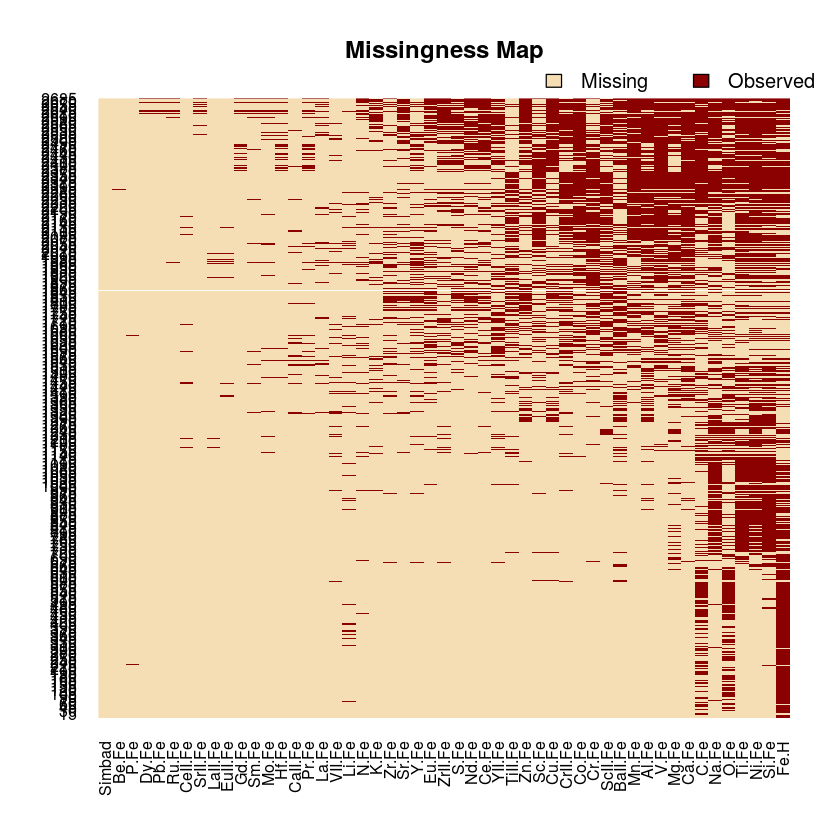

In [33]:
aa = aa[temp1$ix,temp$ix]
options(repr.plot.width=7, repr.plot.height=7)
missmap(aa)

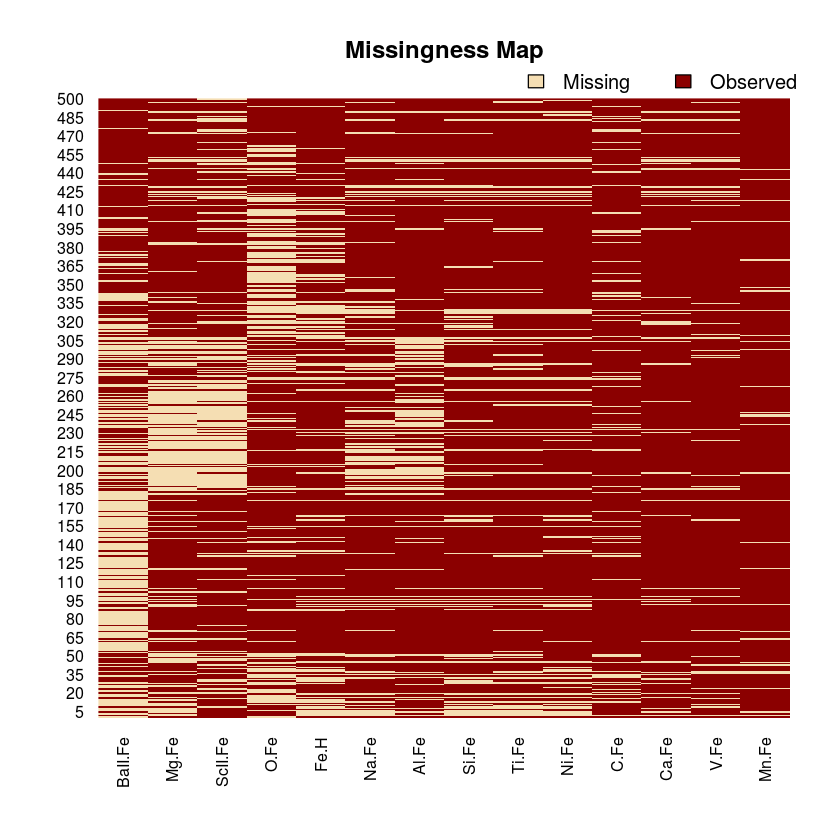

In [34]:
bb = aa[1:500,1:14]
missmap(bb)

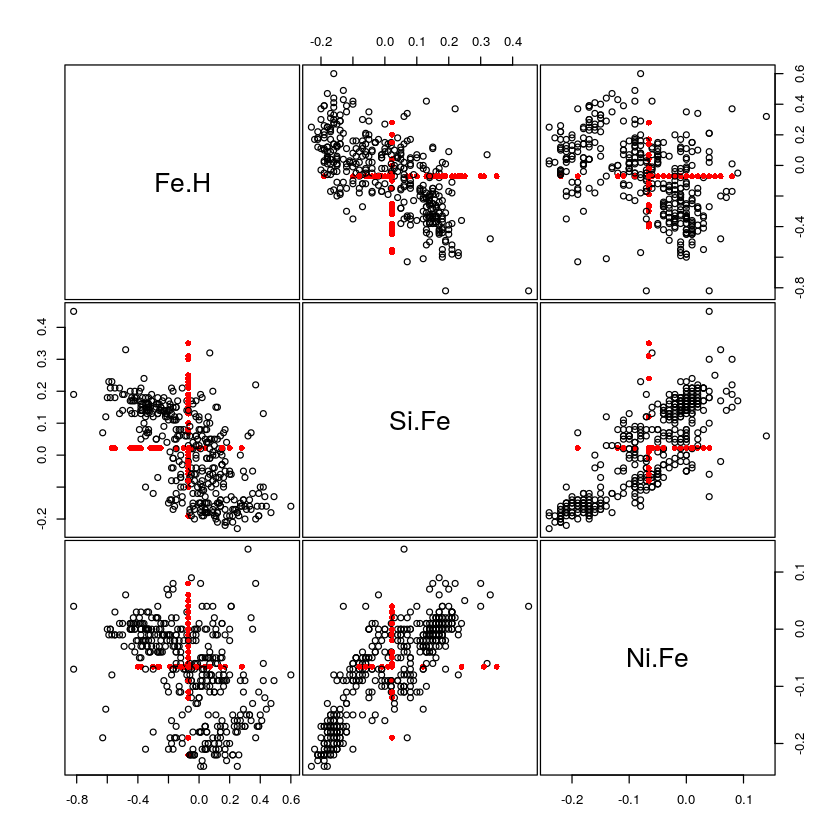

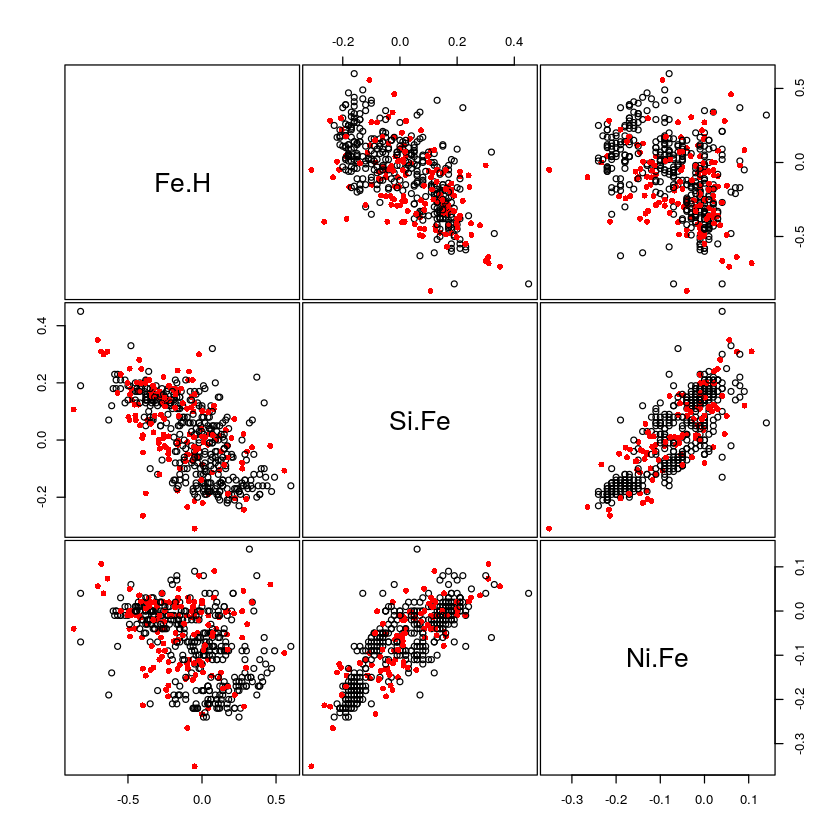

In [35]:
## imputation

library(mclust)

## with mean of that feature
cc = bb
temp = apply(bb, 2, function(x){mean(x,na.rm = T)})
for(ii in 1:ncol(bb)){
  cc[is.na(bb[,ii]),ii] = temp[ii]
}

## with mixture model
dd = imputeData(bb)

imputePairs(bb[,1:3],cc) ## with means
imputePairs(bb[,1:3],dd) ## with mixture model

## PCA


Loadings:
        Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
Fe.H     0.422 -0.135  0.743  0.298               -0.148 -0.204  0.211        
Si.Fe   -0.240 -0.153                       0.289 -0.327  0.164  0.160  0.303 
Ni.Fe   -0.128 -0.121         0.164                                           
Ti.Fe                 -0.118  0.131        -0.359  0.143 -0.284        -0.167 
O.Fe    -0.620         0.505 -0.245  0.219 -0.401 -0.155        -0.125  0.144 
Na.Fe   -0.148 -0.190         0.289         0.216 -0.668        -0.252 -0.352 
C.Fe    -0.413  0.223  0.195        -0.625  0.415  0.241        -0.132        
Ca.Fe   -0.149        -0.154         0.230        -0.134                      
Mg.Fe   -0.176 -0.167 -0.212  0.275  0.129  0.121        -0.247  0.294  0.647 
V.Fe                  -0.111  0.258 -0.587 -0.599 -0.176  0.336  0.168  0.109 
Al.Fe          -0.102 -0.119  0.338 -0.160 -0.102  0.156 -0.635 -0.326        
Mn.Fe          -0.231  0.137  0.408  0.18

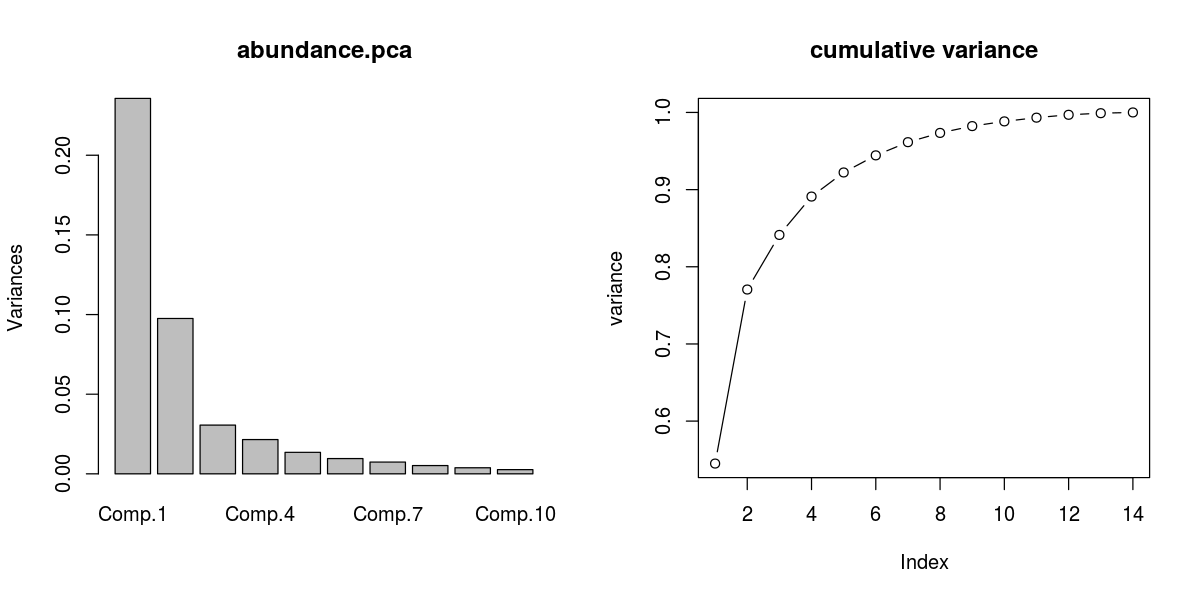

In [48]:
abundance.pca = princomp(dd) #Calculate the principal components
sdev = abundance.pca$sdev #Saving the standard deviation
abundance.scores.wt = sdev^2/sum(sdev^2)
abundance.scores = abundance.pca$scores #Coordinates for each star in the new reference
abundance.pca$loadings
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
plot(abundance.pca)  #Plot the histogram of the variance for the principal components
plot(cumsum(abundance.scores.wt),type="b", ylab = "variance", main="cumulative variance") 
options(repr.plot.width=7, repr.plot.height=7)

## Weighted boostrapping tree

In [41]:
n = nrow(dd) ## number of stars
p = ncol(dd) ## number of chemicals/features

D.big = as.matrix(dist(dd, method = "manhattan")) ## distance matrix according to equation (1) in Jofre 2017.

phytree.big = NJ(D.big) ## original tree using NJ method

options(repr.plot.width=7, repr.plot.height=14)
#plot(phytree.big,show.tip.label = F) ## plot original tree, rooted
#plot(phytree.big, type="unrooted") ## plot original tree, unrooted

In [ ]:
## begin boostrapping

B = 100 ## number of bootstrapping samples
set.seed(2017) ## always a good idea to set the seed
Bsample = matrix(0,nrow = B,ncol=p) ## matrix to store bootstrapping sample index
for(ii in 1:B){
  Bsample[ii,] = sample(1:p, replace = T) ## with replacement
}

njtrees.big = list()
for(jj in 1:B){
  abundancejj = dd[,Bsample[jj,]] ## resamaple the features, not the observatios/stars
  Djj = as.matrix(dist(abundancejj, method = "manhattan"))
  njtrees.big[[jj]] = NJ(Djj)
}
class(njtrees.big) <- "multiPhylo"

In [ ]:
## plot the bootstrapping/robust tree
tree.big <- plotBS(phytree.big, njtrees.big, "phylogram", p=0) ## p is the proportion support to see if branch is significant or not

tree.big.prume = pruneTree(tree.big, 90)

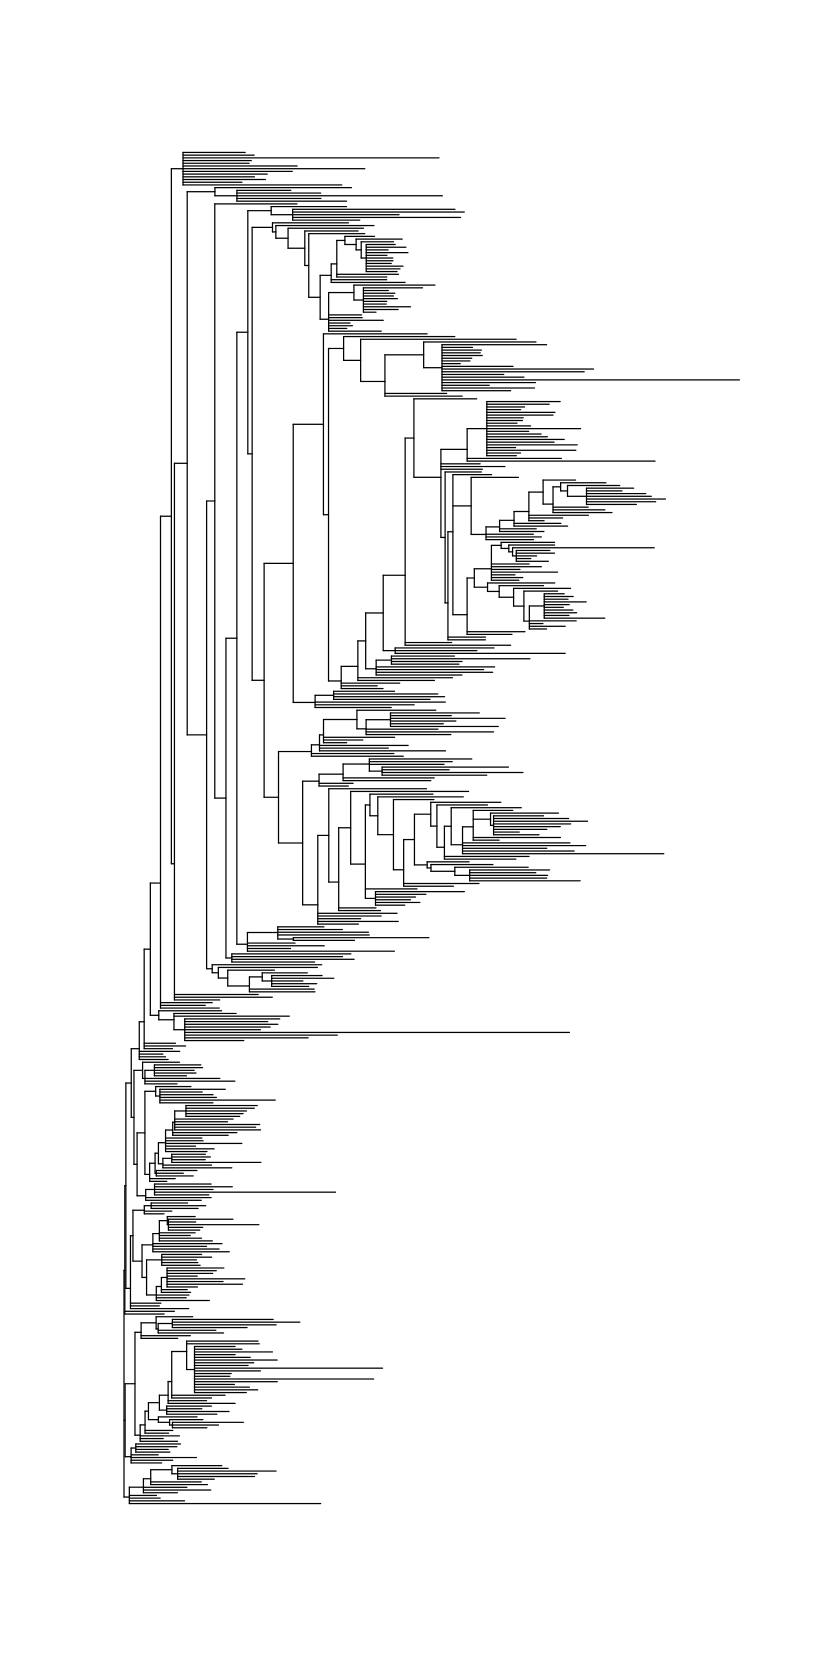

In [43]:
plot(tree.big.prume, show.tip.label = F)

## K-mean and PAM

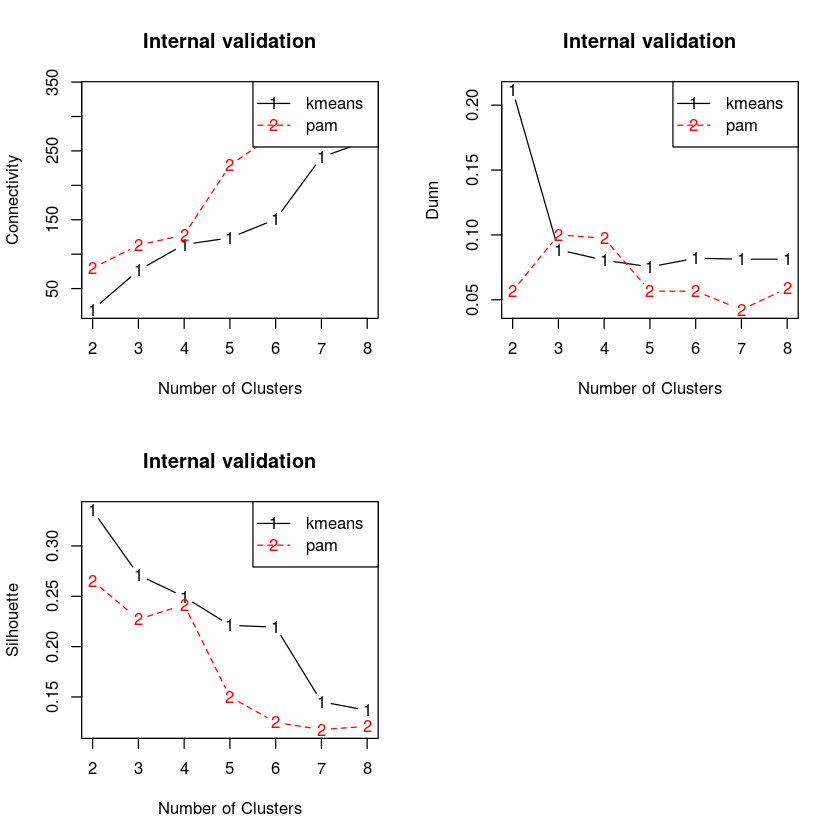

In [46]:
library(clValid)
clabundance = clValid(abundance.scores, nClust = 2:8, clMethods = c("kmeans","pam"), 
                      validation = c("internal"), metric = "manhattan")
#summary(clabundance)
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow=c(2,2))
plot(clabundance)

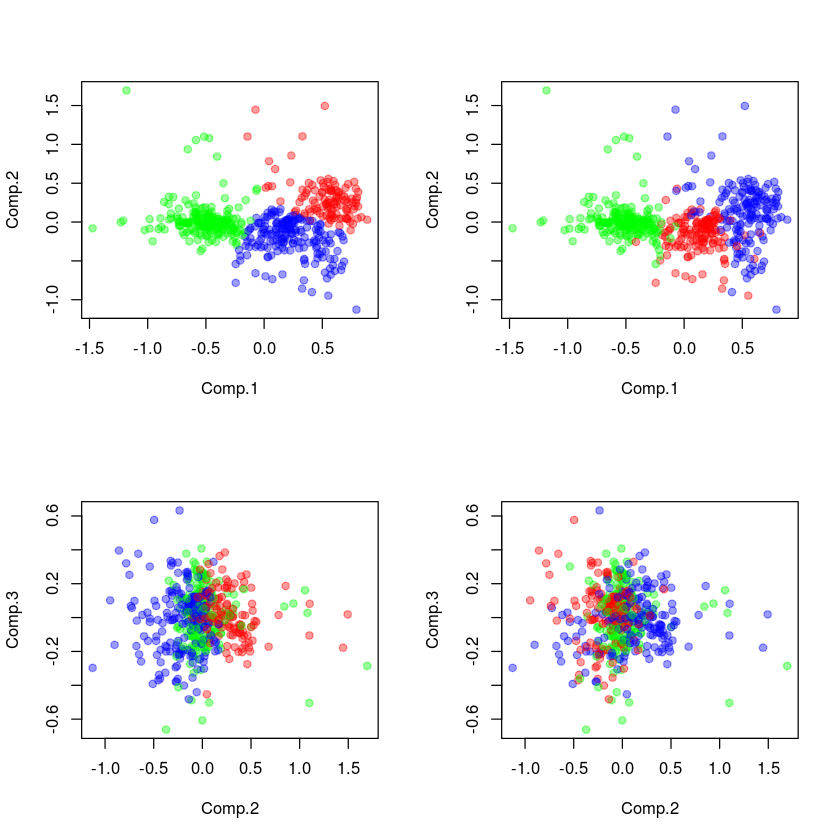

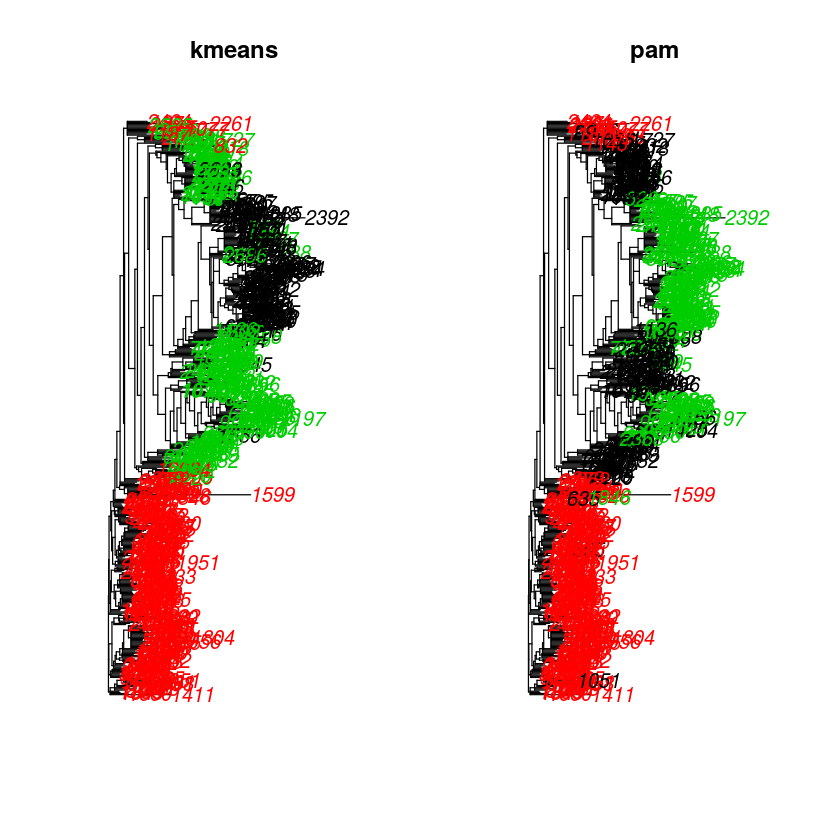

In [47]:
## kmeans / pam

library(cluster)

G = 3
abundance.kmeans = kmeans(abundance.scores[,1:3], G, iter.max = 1000)
abundance.pam = pam(abundance.scores, G, metric = "manhattan")

colors = c("#FF000064","#00FF0064","#0000FF64")
par(mfrow = c(2,2))
plot(abundance.scores[,1:2],col = colors[abundance.kmeans$cluster], pch = 19)
#text(abundance.scores[,1:2] + 0.005, label=action$Age[-22])
plot(abundance.scores[,1:2],col = colors[abundance.pam$clustering], pch = 19)
#text(abundance.scores[,1:2] + 0.005, label=action$Age[-22])
plot(abundance.scores[,2:3],col = colors[abundance.kmeans$cluster], pch = 19)
#text(abundance.scores[,2:3] + 0.005, label=action$Age[-22])
plot(abundance.scores[,2:3],col = colors[abundance.pam$clustering], pch = 19)
#text(abundance.scores[,2:3] + 0.005, label=action$Age[-22])
par(mfrow = c(1,1))
par(mfrow = c(1,2))
plot(tree.big.prume,tip.color = abundance.kmeans$cluster, main="kmeans")
plot(tree.big.prume,tip.color = abundance.pam$clustering, main="pam")

# Next steps

* Use kinematic metrics;
* Find age information to check result of the catalog in Hinkel et al 2014.